In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the dataset
data = pd.read_csv("../datasets/phishing_set.csv")

# Separate features and target
X = data.drop(columns=['phishing'])
y = data['phishing']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier with basic parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_xgb = grid_search.best_estimator_

# Save the trained model as a .pkl file
joblib.dump(best_xgb, "xgboost_phishing_model.pkl")

print("Model saved as xgboost_phishing_model.pkl")

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Load the dataset
data = pd.read_csv("../datasets/dataset_phishing.csv")
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [59]:
# Drop the URL, port, and features below port
data = data.drop(columns=[
    'url', 'port', 'nb_semicolumn', 'nb_or', 'nb_tilde', 'nb_at', 'nb_star', 
    'dns_record', 'nb_comma', 'ratio_intErrors', 'nb_dollar', 
    'nb_external_redirection', 'ratio_intRedirection', 'ratio_nullHyperlinks', 
    'brand_in_path', 'brand_in_subdomain', 'submit_email', 'sfh', 
    'path_extension', 'right_clic', 'tld_in_subdomain', 'punycode', 'iframe', 
    'popup_window', 'nb_dslash', 'onmouseover', 'abnormal_subdomain', 'http_in_path', 'nb_subdomains', 'page_rank','nb_hyperlinks', 'statistical_report', 'web_traffic', 'domain_in_title', 'domain_age', 'empty_title', 'ratio_extHyperlinks', 'external_favicon', 'safe_anchor', 'domain_with_copyright', 'ratio_extRedirection', 'ratio_extMedia','nb_extCSS', 'ratio_extErrors','ratio_intHyperlinks','links_in_tags','whois_registered_domain','ratio_intMedia','random_domain','login_form','nb_redirection','domain_registration_length'
])


In [60]:
# Separate features and labels
X = data.iloc[:, :-1].values  # All rows, all columns except the last (label)
y = data.iloc[:, -1].apply(lambda x: 1 if x == 'phishing' else 0).values  # Convert labels to binary
feature_names = data.columns[:-1]  # Column names except the last column


In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [63]:
# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             verbose=1)

In [64]:
# Best model
best_model = grid_search.best_estimator_

In [65]:
# Save the best model to a .pkl file
with open("xg_phishing.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

In [66]:
# Evaluate model accuracy
score = best_model.score(X_test, y_test)
print(f"Model Accuracy: {score * 100:.2f}%")
print("Best parameters found: ", grid_search.best_params_)

Model Accuracy: 95.19%
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


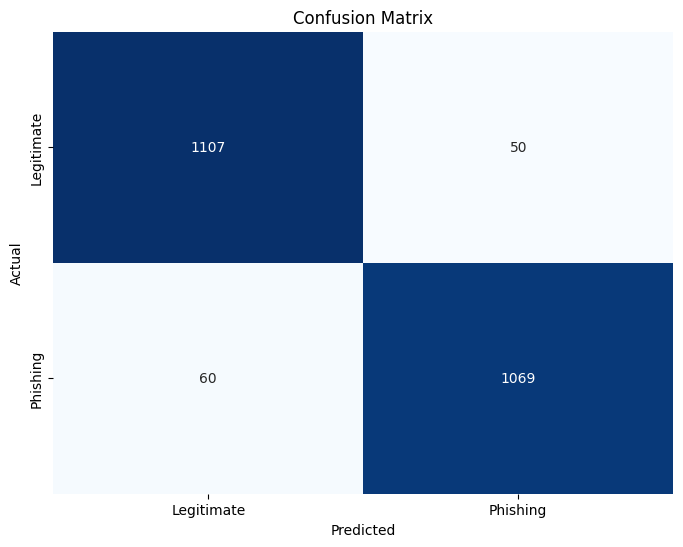

In [67]:
# Make predictions and plot confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))



Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      0.96      0.95      1157
    Phishing       0.96      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



In [69]:
# Feature Importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

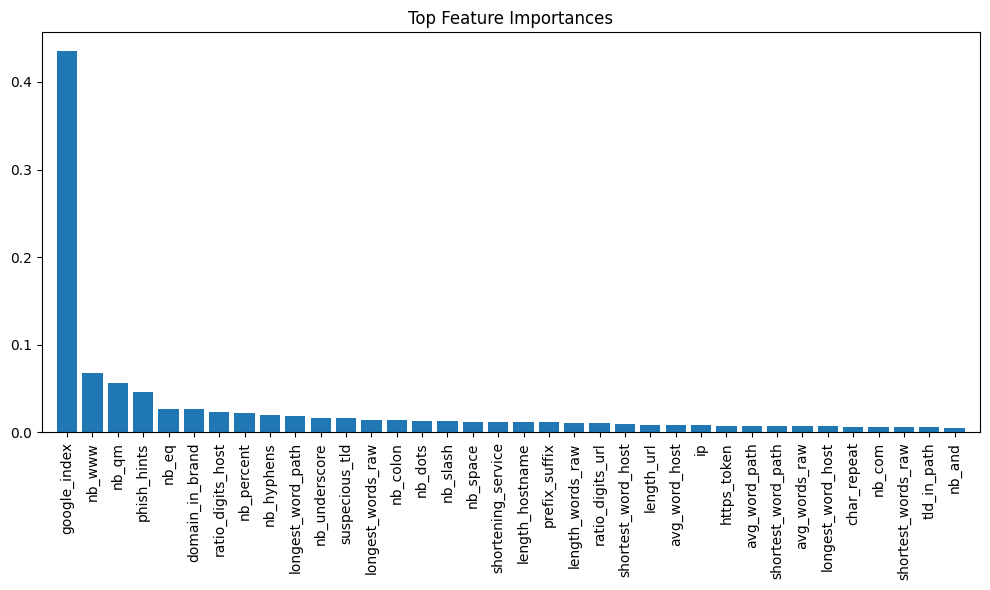

In [70]:
# Plot feature importances with feature names
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlim([-1, len(feature_names)])
plt.tight_layout()
plt.show()

In [71]:
# Save the top N features to a .txt file
top_n = 100
top_features = [feature_names[i] for i in indices[:top_n]]
with open("top_features.txt", "w") as f:
    for feature in top_features:
        f.write(f"{feature}\n")

print(f"Top {top_n} features saved to top_features.txt")

Top 100 features saved to top_features.txt


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Load the dataset
data = pd.read_csv("dataset_phishing.csv")

# Drop the URL column as it's not numeric
data = data.drop(columns=['url'])

# Separate features and labels
X = data.iloc[:, :-1].values  # All rows, all columns except the last (label)
y = data.iloc[:, -1].apply(lambda x: 1 if x == 'phishing' else 0).values  # Convert labels to binary
feature_names = data.columns[:-1]  # Column names except the last column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Save the best model to a .pkl file
with open("xgb_phishing.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Evaluate model accuracy
score = best_model.score(X_test, y_test)
print(f"Model Accuracy: {score * 100:.2f}%")
print("Best parameters found: ", grid_search.best_params_)

# Make predictions and plot confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

# Feature Importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Plot feature importances with feature names
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlim([-1, len(feature_names)])
plt.tight_layout()
plt.show()

# Save the top N features to a .txt file
top_n = 15
top_features = [feature_names[i] for i in indices[:top_n]]
with open("top_features.txt", "w") as f:
    for feature in top_features:
        f.write(f"{feature}\n")

print(f"Top {top_n} features saved to top_features.txt")
